# Import libraries

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import re
import numpy as np
import seaborn as sns

In [3]:
# Daily new case data by county
us_cnty_daily = pd.read_csv("cs156b-data/us/covid/nyt_us_counties_daily.csv")
# Make data column into datetime
us_cnty_daily['date'] = pd.to_datetime(us_cnty_daily['date'])
us_cnty_daily

,fips,date,county,state,cases,deaths
0,53061,2020-01-21,Snohomish,Washington,1.0,0.0
1,53061,2020-01-22,Snohomish,Washington,0.0,0.0
2,53061,2020-01-23,Snohomish,Washington,0.0,0.0
3,53061,2020-01-24,Snohomish,Washington,0.0,0.0
4,53061,2020-01-25,Snohomish,Washington,0.0,0.0
...,...,...,...,...,...,...
1141172,15005,2021-03-19,Kalawao,Hawaii,0.0,0.0
1141173,15005,2021-03-20,Kalawao,Hawaii,0.0,0.0
1141174,15005,2021-03-21,Kalawao,Hawaii,0.0,0.0
1141175,15005,2021-03-22,Kalawao,Hawaii,0.0,0.0


In [4]:
# Grouping the case data by state 
us_state_daily = us_cnty_daily.groupby(['state','date']).sum()
us_state_daily = us_state_daily.reset_index()[['state', 'date', 'cases', 'deaths']]
us_state_daily

,state,date,cases,deaths
0,Alabama,2020-03-13,6.0,0.0
1,Alabama,2020-03-14,6.0,0.0
2,Alabama,2020-03-15,11.0,0.0
3,Alabama,2020-03-16,6.0,0.0
4,Alabama,2020-03-17,10.0,0.0
...,...,...,...,...
21031,Wyoming,2021-03-19,102.0,0.0
21032,Wyoming,2021-03-20,0.0,0.0
21033,Wyoming,2021-03-21,0.0,0.0
21034,Wyoming,2021-03-22,150.0,0.0


In [5]:
# See this link: https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md
# for details on column descriptions
policy_data = pd.read_csv("our_data/policy_data/international/OxCGRT_latest.csv")
# Make Date column in datetime 
policy_data['Date'] = pd.to_datetime(policy_data['Date'], format='%Y%m%d')
policy_data

C:\Users\gleb_\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131222,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,2021-04-07,1.0,1.0,2.0,1.0,...,57.41,57.41,70.24,70.24,48.23,48.23,55.12,55.12,0.0,0.0
131223,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,2021-04-08,1.0,1.0,2.0,1.0,...,57.41,57.41,70.24,70.24,48.23,48.23,55.12,55.12,0.0,0.0
131224,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,2021-04-09,1.0,1.0,2.0,1.0,...,57.41,57.41,70.24,70.24,48.23,48.23,55.12,55.12,0.0,0.0
131225,Zimbabwe,ZWE,NaN,NaN,NAT_TOTAL,2021-04-10,1.0,1.0,2.0,1.0,...,57.41,57.41,70.24,70.24,48.23,48.23,55.12,55.12,0.0,0.0


In [7]:
# Rename columns and make lowercase

def change_case(str):
    '''
    Takes string and converts from camel case to snake case,
    returns new string in snake case
    '''
    underscore_seen = str[0] == '_'
    
    res = [str[0].lower()]
    for c in str[1:]:
        if c in ('ABCDEFGHIJKLMNOPQRSTUVWXYZ'):
            if not underscore_seen:
                res.append('_')
            res.append(c.lower())
        else:
            res.append(c)
            underscore_seen = 0
        underscore_seen = c == '_'
     
    return ''.join(res)

# Strip outer whitespace and replace inner whitespace with underscore
policy_data.columns = policy_data.columns.str.strip().str.replace(" ", "_")

# Convert camelcase columns to snake case
new_cols = []
for index, c in policy_data.iteritems():
    new_cols.append(change_case(index))
policy_data.columns = pd.Index(new_cols)
policy_data.columns

Index(['country_name', 'country_code', 'region_name', 'region_code',
       'jurisdiction', 'date', 'c1_school_closing', 'c1_flag',
       'c2_workplace_closing', 'c2_flag', 'c3_cancel_public_events', 'c3_flag',
       'c4_restrictions_on_gatherings', 'c4_flag', 'c5_close_public_transport',
       'c5_flag', 'c6_stay_at_home_requirements', 'c6_flag',
       'c7_restrictions_on_internal_movement', 'c7_flag',
       'c8_international_travel_controls', 'e1_income_support', 'e1_flag',
       'e2_debt/contract_relief', 'e3_fiscal_measures',
       'e4_international_support', 'h1_public_information_campaigns',
       'h1_flag', 'h2_testing_policy', 'h3_contact_tracing',
       'h4_emergency_investment_in_healthcare', 'h5_investment_in_vaccines',
       'h6_facial_coverings', 'h6_flag', 'h7_vaccination_policy', 'h7_flag',
       'h8_protection_of_elderly_people', 'h8_flag', 'm1_wildcard',
       'confirmed_cases', 'confirmed_deaths', 'stringency_index',
       'stringency_index_for_display', 

In [10]:
# Replace NaNs in policy columns such as c1_school_closing.
# At earliest NaN, fill based on previous policy value
r1 = re.compile("c[123456789]_flag")
r2 = re.compile("c[123456789]_\S")

policy_col_names = []
for c_index, c in policy_data.iteritems():
        if not bool(r1.search(c_index)) and bool(r2.search(c_index)):
            policy_col_names.append(c_index)

running_df = None
for name_df, df in policy_data.groupby(['country_code', 'region_code']):      
    df.loc[:, policy_col_names] = df[policy_col_names].ffill()
    if running_df is None:
        running_df = df.copy()
    else:
        running_df = pd.concat([running_df, df], axis = 0)
        
filled_policy_data_df = running_df.copy()

In [172]:
us_filled_policy_data_df = filled_policy_data_df.loc[filled_policy_data_df['country_code'] == 'USA'].copy()
us_filled_policy_data_df.columns

Index(['country_name', 'country_code', 'region_name', 'region_code',
       'jurisdiction', 'date', 'c1_school_closing', 'c1_flag',
       'c2_workplace_closing', 'c2_flag', 'c3_cancel_public_events', 'c3_flag',
       'c4_restrictions_on_gatherings', 'c4_flag', 'c5_close_public_transport',
       'c5_flag', 'c6_stay_at_home_requirements', 'c6_flag',
       'c7_restrictions_on_internal_movement', 'c7_flag',
       'c8_international_travel_controls', 'e1_income_support', 'e1_flag',
       'e2_debt/contract_relief', 'e3_fiscal_measures',
       'e4_international_support', 'h1_public_information_campaigns',
       'h1_flag', 'h2_testing_policy', 'h3_contact_tracing',
       'h4_emergency_investment_in_healthcare', 'h5_investment_in_vaccines',
       'h6_facial_coverings', 'h6_flag', 'h7_vaccination_policy', 'h7_flag',
       'h8_protection_of_elderly_people', 'h8_flag', 'm1_wildcard',
       'confirmed_cases', 'confirmed_deaths', 'stringency_index',
       'stringency_index_for_display', 

<AxesSubplot:>

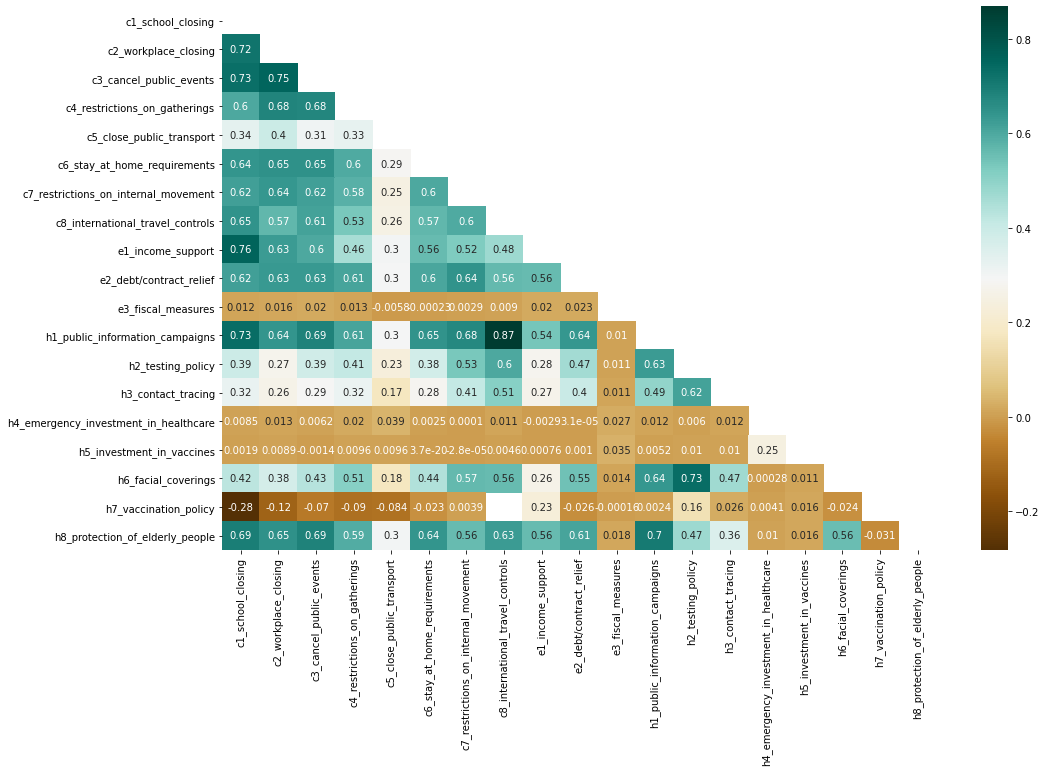

In [182]:
policies = ['c1_school_closing', 'c2_workplace_closing', 'c3_cancel_public_events',
           'c4_restrictions_on_gatherings', 'c5_close_public_transport', 'c6_stay_at_home_requirements',
           'c7_restrictions_on_internal_movement', 'c8_international_travel_controls', 'e1_income_support', 
           'e2_debt/contract_relief', 'e3_fiscal_measures', 'h1_public_information_campaigns',
           'h2_testing_policy', 'h3_contact_tracing', 'h4_emergency_investment_in_healthcare', 'h5_investment_in_vaccines',
           'h6_facial_coverings', 'h7_vaccination_policy','h8_protection_of_elderly_people']


# Looking at correlation heatmap between different policies
plt.figure(figsize=(16, 10))
policies_corr_mat = us_filled_policy_data_df[policies].corr()
sns.heatmap(policies_corr_mat, annot=True, cmap='BrBG', 
           mask=np.triu(np.ones_like(policies_corr_mat)))

In [175]:
# don't need country name (only looking at U.S.) or any flags
temp_policy_part = us_filled_policy_data_df.copy()
temp_policy_part = temp_policy_part[['region_name', 'date']+policies]
temp_policy_part

,region_name,date,c1_school_closing,c2_workplace_closing,c3_cancel_public_events,c4_restrictions_on_gatherings,c5_close_public_transport,c6_stay_at_home_requirements,c7_restrictions_on_internal_movement,c8_international_travel_controls,...,e2_debt/contract_relief,e3_fiscal_measures,h1_public_information_campaigns,h2_testing_policy,h3_contact_tracing,h4_emergency_investment_in_healthcare,h5_investment_in_vaccines,h6_facial_coverings,h7_vaccination_policy,h8_protection_of_elderly_people
103207,Alaska,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
103208,Alaska,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
103209,Alaska,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
103210,Alaska,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
103211,Alaska,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127019,Wyoming,2021-04-07,1.0,1.0,1.0,2.0,2.0,0.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127020,Wyoming,2021-04-08,1.0,1.0,1.0,2.0,2.0,0.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127021,Wyoming,2021-04-09,1.0,1.0,1.0,2.0,2.0,0.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127022,Wyoming,2021-04-10,1.0,1.0,1.0,2.0,2.0,0.0,1.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
stay_at_home_df = temp_policy_part[['region_name', 'date', 'c6_stay_at_home_requirements']].copy()
stay_at_home_df

,region_name,date,c6_stay_at_home_requirements
103207,Alaska,2020-01-01,0.0
103208,Alaska,2020-01-02,0.0
103209,Alaska,2020-01-03,0.0
103210,Alaska,2020-01-04,0.0
103211,Alaska,2020-01-05,0.0
...,...,...,...
127019,Wyoming,2021-04-07,0.0
127020,Wyoming,2021-04-08,0.0
127021,Wyoming,2021-04-09,0.0
127022,Wyoming,2021-04-10,0.0


In [177]:
def time_elapsed_since_policy_change(policy_df, policy_name,
                                     type_change='more_strict'):
    '''
    Takes policy_df with columns 'date',<policy_name>, 'region_name'
    where the <policy_name> column contains a series of numbers on an ordinal scale of strictness
   (highest number = most strict) and
    Returns a list of number
    of days since change in policy in a given region on a given date
    
    Assuming the date column has all dates in a contiguous period.
    '''
    time_elapsed_all_regions = np.zeros(policy_df.shape[0])
    
    for region in policy_df.region_name.unique(): 
        region_dates = policy_df.loc[policy_df.region_name == region, 'date']
        
        region_policies = policy_df.loc[policy_df.region_name == region, policy_name]
        
        time_elapsed= np.arange(0, region_dates.size)
        
        prev_region_policies = region_policies.shift()
        prev_region_policies.iloc[0] = 0 #assuming there was no policy in place before the first date
        
        if type_change == 'more_strict':
            points_of_change_mask = ((region_policies - prev_region_policies) > 0).to_numpy()
        else:
             points_of_change_mask = ((region_policies - prev_region_policies) < 0).to_numpy()

        
        for i in range(time_elapsed[points_of_change_mask].size):
            # point is the index at which a change has occured
            point = time_elapsed[points_of_change_mask][i]
            
            if i == 0 and point > 0 :
                time_elapsed[:point] = 0
                
            if i < time_elapsed[points_of_change_mask].size-1:
                next_point = time_elapsed[points_of_change_mask][i+1]
                time_elapsed[point:next_point] -= point
            else:
                time_elapsed[point:] -= point
        
        time_elapsed_all_regions[policy_df.region_name == region] = time_elapsed
        # END for; next region
    
    return time_elapsed_all_regions
    
    

In [189]:
stay_at_home_df.loc[:, 'days_since_more_strict'] = time_elapsed_since_policy_change(stay_at_home_df, 
                                                                                     'c6_stay_at_home_requirements',
                                                                                      type_change='more_strict')
stay_at_home_df.loc[:, 'days_since_less_strict'] = time_elapsed_since_policy_change(stay_at_home_df, 
                                                                                     'c6_stay_at_home_requirements',
                                                                                      type_change='less_strict')

In [190]:
stay_at_home_df.to_csv('stay_at_home.csv')